## Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 

Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.


## 1) Get familiar with data

In [5]:
import pandas as pd

path='/home/dsc/Data/challenge/'
file_name='searches.csv.bz2'
#file_name='searches.sample.csv.bz2'
filepath=path+'/'+file_name

s=pd.read_csv(filepath, sep='^', usecols=['Date', 'Destination'], nrows=10000)

In [6]:
s.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


In [11]:
sFilter.head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


### 4.1) filter out the the searches for MAD, BCN, AGP
take only the rows having MAD, BCN or AGP as destination

In [26]:
#option 1 with parse_dates
import pandas as pd

path='/home/dsc/Data/challenge/'
file_name='searches.csv.bz2'
#file_name='searches.sample.csv.bz2'
filepath=path+'/'+file_name

s=pd.read_csv(filepath, sep='^', usecols=['Date', 'Destination'], parse_dates=['Date'], nrows=10000)
s=s.dropna()
sFilter=s[s['Destination'].isin(['MAD','BCN','AGP'])]
sFilter['Month']=sFilter.Date.map(lambda x: "%d-%02d"%(x.year,x.month))
#sFilter=s[(s['Destination']=='MAD') | (s['Destination']=='BCN') | (s['Destination']=='AGP')]

/home/dsc/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [28]:
sFilter.head()

,Date,Destination,Month
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


In [40]:
#option 2 with pd.to_datetime()
import pandas as pd

path='/home/dsc/Data/challenge/'
file_name='searches.csv.bz2'
#file_name='searches.sample.csv.bz2'
filepath=path+'/'+file_name

s=pd.read_csv(filepath, sep='^', usecols=['Date', 'Destination'], nrows=10000)
s=s.dropna()
sFilter=s[s['Destination'].isin(['MAD','BCN','AGP'])].copy()
#sFilter=s[(s['Destination']=='MAD') | (s['Destination']=='BCN') | (s['Destination']=='AGP')]
sFilter['Date']=pd.to_datetime(sFilter.Date)
sFilter['Month']=sFilter.Date.map(lambda x: "%d-%02d"%(x.year,x.month))

/home/dsc/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dsc/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [30]:
sFilter.head()

,Date,Destination,Month
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


In [31]:
#option 3 with string split

path='/home/dsc/Data/challenge/'
file_name='searches.csv.bz2'
#file_name='searches.sample.csv.bz2'
filepath=path+'/'+file_name

s=pd.read_csv(filepath, sep='^', usecols=['Date', 'Destination'], nrows=10000)
s=s.dropna()
sFilter=s[s['Destination'].isin(['MAD','BCN','AGP'])]
sFilter['Month']=sFilter.Date.map(lambda x: "%s-%s"%(x.split('-')[0],x.split('-')[1]))

/home/dsc/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
sFilter.head()

,Date,Destination,Month
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


In [33]:
a='2013-01-03'

In [34]:
a.split('-')

['2013', '01', '03']

In [35]:
a.split('-')[0]

'2013'

In [37]:
sFilter.head()

,Date,Destination,Month
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


### 4.2) group by arr_port and month


In [38]:
#sFilter.drop('Date', axis=1, inplace=True)

/home/dsc/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [41]:
sFilter.head()

,Date,Destination,Month
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


In [52]:
sFilter.groupby(['Destination', 'Month']).count()


,,Date
Destination,Month,
AGP,2013-01,48
BCN,2013-01,162
MAD,2013-01,125


In [51]:
sFilter_gr=sFilter.groupby(['Destination', 'Month']).count().reset_index()
sFilter_gr.head()

,Destination,Month,Date
0,AGP,2013-01,48
1,BCN,2013-01,162
2,MAD,2013-01,125


In [46]:
sFilter_gr.rename(columns={'Date':'Searches'}, inplace=True)

In [47]:
sFilter_gr.head()

,Destination,Month,Searches
0,AGP,2013-01,48
1,BCN,2013-01,162
2,MAD,2013-01,125


## 4.3 Plotting

In [1]:
#option 1 with parse_dates
import pandas as pd

path='/home/dsc/Data/challenge/'
file_name='searches.csv.bz2'
#file_name='searches.sample.csv.bz2'
filepath=path+'/'+file_name

s=pd.read_csv(filepath, sep='^', usecols=['Date', 'Destination'], parse_dates=['Date']\
              , nrows=100000)
s=s.dropna()
sFilter=s[s['Destination'].isin(['MAD','BCN','AGP'])].copy()
sFilter['Month']=sFilter.Date.map(lambda x: "%d-%02d"%(x.year,x.month))
#sFilter=s[(s['Destination']=='MAD') | (s['Destination']=='BCN') | (s['Destination']=='AGP')]

sFilter_gr=sFilter.groupby(['Destination', 'Month']).count().reset_index()
sFilter_gr.rename(columns={'Date':'Searches'}, inplace=True)

In [ ]:
#option 2 with pd.to_datetime()
import pandas as pd

path='/home/dsc/Data/challenge/'
file_name='searches.csv.bz2'
#file_name='searches.sample.csv.bz2'
filepath=path+'/'+file_name

s=pd.read_csv(filepath, sep='^', usecols=['Date', 'Destination'], nrows=10000)
s=s.dropna()
sFilter=s[s['Destination'].isin(['MAD','BCN','AGP'])].copy()
#sFilter=s[(s['Destination']=='MAD') | (s['Destination']=='BCN') | (s['Destination']=='AGP')]
sFilter['Date']=pd.to_datetime(sFilter.Date)
sFilter['Month']=sFilter.Date.map(lambda x: "%d-%02d"%(x.year,x.month))

sFilter_gr=sFilter.groupby(['Destination', 'Month']).count().reset_index()
sFilter_gr.rename(columns={'Date':'Searches'}, inplace=True)

In [19]:
#option 3 with string split
import pandas as pd
path='/home/dsc/Data/challenge/'
file_name='searches.csv.bz2'
#file_name='searches.sample.csv.bz2'
filepath=path+'/'+file_name

s=pd.read_csv(filepath, sep='^', usecols=['Date', 'Destination'], nrows=100000)
s=s.dropna()
sFilter=s[s['Destination'].isin(['MAD','BCN','AGP'])].copy()
sFilter['Month']=sFilter.Date.map(lambda x: "%s-%s"%(x.split('-')[0],x.split('-')[1]))

sFilter_gr=sFilter.groupby(['Destination', 'Month']).count().reset_index()
sFilter_gr.rename(columns={'Date':'Searches'}, inplace=True)

In [21]:
sFilter_gr.head()

,Destination,Month,Searches
0,AGP,2013-01,169
1,AGP,2013-02,147
2,AGP,2013-03,187
3,AGP,2013-04,31
4,BCN,2013-01,517


In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
sFilter_gr.pivot('Month', 'Destination', 'Searches')

Destination,AGP,BCN,MAD
Month,,,
2013-01,169,517,425
2013-02,147,497,400
2013-03,187,536,433
2013-04,31,174,147


Populating the interactive namespace from numpy and matplotlib


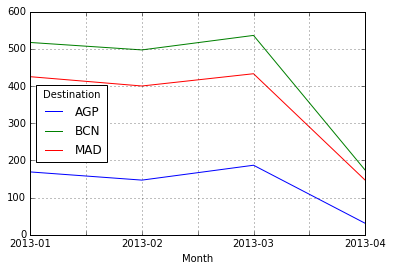

In [11]:
%pylab inline
sFilter_gr.pivot('Month', 'Destination', 'Searches').plot(grid=True)

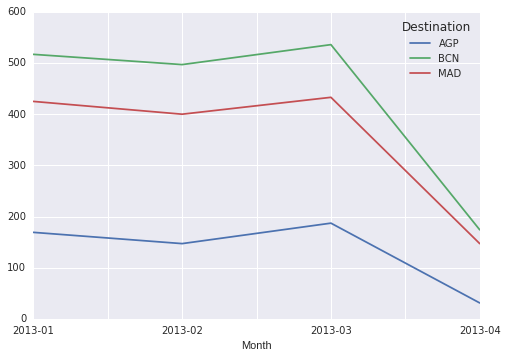

In [12]:
import seaborn as sns
sFilter_gr.pivot('Month', 'Destination', 'Searches').plot(grid=True)

## 4.3.b Step by Step plotting

In [22]:
gr1=sFilter_gr.copy()
gr1.rename(columns={'Date': 'Searches'}, inplace=True)
gr1[gr1['Destination']=='AGP']

,Destination,Month,Searches
0,AGP,2013-01,169
1,AGP,2013-02,147
2,AGP,2013-03,187
3,AGP,2013-04,31


In [23]:
gr1[gr1['Destination']=='AGP'].reset_index()

,index,Destination,Month,Searches
0,0,AGP,2013-01,169
1,1,AGP,2013-02,147
2,2,AGP,2013-03,187
3,3,AGP,2013-04,31


In [24]:
gr1[gr1['Destination']=='AGP'].reset_index()['Searches']

0    169
1    147
2    187
3     31
Name: Searches, dtype: int64

In [25]:
list(gr1[gr1['Destination']=='AGP'].reset_index()['Searches'])

[169, 147, 187, 31]

In [31]:
agp=list(gr1[gr1['Destination']=='AGP'].reset_index()['Searches'])
mad=list(gr1[gr1['Destination']=='MAD'].reset_index()['Searches'])
bcn=list(gr1[gr1['Destination']=='BCN'].reset_index()['Searches'])

In [32]:
gr1.reset_index()['Month'].unique()

array(['2013-01', '2013-02', '2013-03', '2013-04'], dtype=object)

In [33]:
list(gr1.reset_index()['Month'].unique())

['2013-01', '2013-02', '2013-03', '2013-04']

In [34]:
plotdate=list(gr1.reset_index()['Month'].unique())

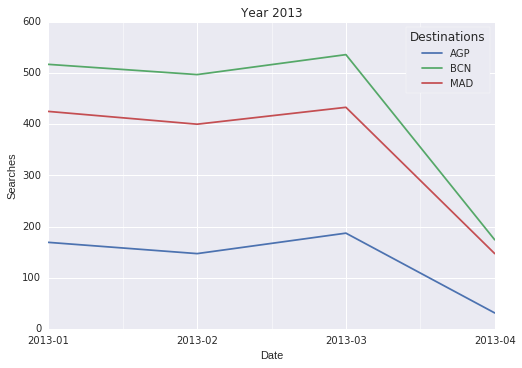

In [35]:
import numpy as np
fig=plt.figure() 
#fig.set_size_inches(12,6) 

ax = fig.add_subplot(1,1,1)  
plt.xlabel("Date")
plt.ylabel("Searches")
#plt.xticks(range(len(plotdate)), plotdate,size='small')
plt.xticks(range(len(plotdate)), plotdate)

major_ticks = range(len(plotdate))                                             
minor_ticks = np.arange(0, len(plotdate), 0.5) 
ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)   
ax.grid(which='both') 
ax.grid(which='minor', alpha=0.5)                                                
ax.grid(which='major', alpha=1)

plt.plot(agp, label='AGP')
plt.plot(bcn, label='BCN')
plt.plot(mad, label='MAD')

plt.grid(True)

#plt.legend(["Madrid", "Barcelona", "Malaga"],loc='center left', frameon=True)
plt.legend(["AGP","BCN", "MAD"],loc='best', frameon=True, title="Destinations")

#plt.bar(range(len(y)), y, align='center')

plt.title("Year 2013")

## 5) Adjust the code to work with Big data

In [13]:
%%time
#option 1 with parse_dates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path='/home/dsc/Data/challenge/'
file_name='searches.csv.bz2'
#file_name='searches.sample.csv.bz2'
filepath=path+'/'+file_name

all_chunks=pd.DataFrame()
bc=pd.read_csv(filepath, sep='^', usecols=['Date', 'Destination'], parse_dates=['Date']\
              , chunksize=500000)

for i, chunk in enumerate(bc):
    print i
    s=chunk.dropna()
    sFilter=s[s['Destination'].isin(['MAD','BCN','AGP'])].copy()
    sFilter['Month']=sFilter.Date.map(lambda x: "%d-%02d"%(x.year,x.month))

    sFilter_gr=sFilter.groupby(['Destination', 'Month']).count().reset_index()
    sFilter_gr.rename(columns={'Date':'Searches'}, inplace=True)
    
    all_chunks=all_chunks.append(sFilter_gr)
    
plot_data=all_chunks.groupby(['Destination', 'Month']).sum().reset_index()
fig=plot_data.pivot('Month', 'Destination', 'Searches').plot(grid=True)

0
1
2


AttributeError: 'str' object has no attribute 'year'

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
CPU times: user 3min 33s, sys: 4.12 s, total: 3min 37s
Wall time: 3min 38s


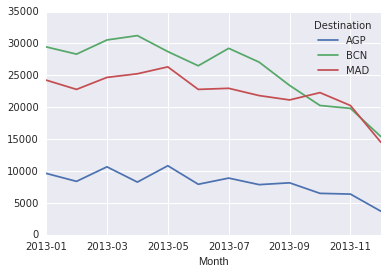

In [14]:
%%time
#option 2 with pd.to_datetime()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path='/home/dsc/Data/challenge/'
file_name='searches.csv.bz2'
#file_name='searches.sample.csv.bz2'
filepath=path+'/'+file_name

all_chunks=pd.DataFrame()

bc=pd.read_csv(filepath, sep='^', usecols=['Date', 'Destination'], chunksize=500000)

for i, chunk in enumerate(bc):
    print i
    s=chunk.dropna()
    sFilter=s[s['Destination'].isin(['MAD','BCN','AGP'])].copy()
    sFilter['Date']=pd.to_datetime(sFilter.Date)
    sFilter['Month']=sFilter.Date.map(lambda x: "%d-%02d"%(x.year,x.month))

    sFilter_gr=sFilter.groupby(['Destination', 'Month']).count().reset_index()
    sFilter_gr.rename(columns={'Date':'Searches'}, inplace=True)
    
    all_chunks=all_chunks.append(sFilter_gr)
    
plot_data=all_chunks.groupby(['Destination', 'Month']).sum().reset_index()
fig=plot_data.pivot('Month', 'Destination', 'Searches').plot(grid=True)


0
1
2
3


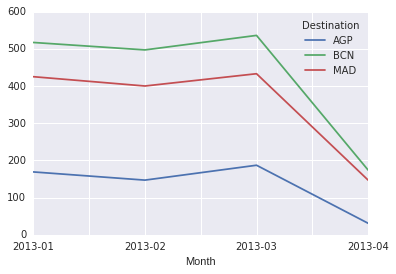

In [11]:
%%time
#option 3 with string split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path='/home/dsc/Data/challenge/'
file_name='searches.csv.bz2'
#file_name='searches.sample.csv.bz2'
filepath=path+'/'+file_name

all_chunks=pd.DataFrame()

bc=pd.read_csv(filepath, sep='^', usecols=['Date', 'Destination'], chunksize=500000)

for i, chunk in enumerate(bc):
    print i
    s=chunk.dropna()
    sFilter=s[s['Destination'].isin(['MAD','BCN','AGP'])].copy()
    sFilter['Month']=sFilter.Date.map(lambda x: "%s-%s"%(x.split('-')[0],x.split('-')[1]))

    sFilter_gr=sFilter.groupby(['Destination', 'Month']).count().reset_index()
    sFilter_gr.rename(columns={'Date':'Searches'}, inplace=True)
    
    all_chunks=all_chunks.append(sFilter_gr)
    
plot_data=all_chunks.groupby(['Destination', 'Month']).sum().reset_index()
fig=plot_data.pivot('Month', 'Destination', 'Searches').plot(grid=True)


### How to find out which line has problems???

In [15]:
cd ../challenge/


/home/dsc/Data/challenge


In [ ]:
!bzcat ./searches.csv.bz2 | cut -d '^' -f 1 | grep -n -E -v \
"^[0-9]{4}-[0-1][0-9]-[0-3][0-9]" >bad_search_lines.csv

In [ ]:
!bzcat ./searches.csv.bz2 | sed 's/\s*^/^/g'>searches_clean.csv

In [ ]:
!bzip2 -f searches_clean.csv